In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Datas

In [3]:
market_ticker = '^GSPC' #'^GSPC' #'btc-usd' #'tsla'
st = 'f'
ma_sign = 90
ma_sign2 = 30

a = 1
a1 = -30

rol_rol_period = 60

fma = 12
sma = 26


stime='2021-05-01'
ftime=None
period = '1d'  # '1d'

In [4]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = pd.DataFrame(get_data_from_ticker(market_ticker, stime, ftime))



df.head(3)

,^GSPC
Date,
2021-04-30,4181.169922
2021-05-03,4192.660156
2021-05-04,4164.660156


In [5]:
def add_percent_update(tick):
    """ date stock's or market's update"""
    gf_copy = df.copy(deep=True)
    gf_copy = pd.DataFrame(gf_copy.drop(df.index[0]))
    gf_copy_v = gf_copy[tick].values
    gf_v = df.copy(deep=True)
    gf_vv = gf_v[tick].values

    for i in range(len(gf_copy)):
        gf_vv[i] = (gf_copy_v[i] - gf_vv[i]) / (gf_vv[i] / 100)

    gf_vv = np.insert(gf_vv, 0, 0)
    gf_vv = np.delete(gf_vv, -1)
    return gf_vv

df[f"% update {market_ticker}"] = add_percent_update(market_ticker)
# gf[f"% update {st}"] = add_percent_update(st)

df.head(3)

,^GSPC,% update ^GSPC
Date,,
2021-04-30,4181.169922,0.000000
2021-05-03,4192.660156,0.274809
2021-05-04,4164.660156,-0.667834


In [6]:
r = list(df[f'% update {market_ticker}'].values)

for i in range(len(r)):
    if df.iloc[i, 1] > 0:
        r[i] = 'Plus'
    else:
        r[i] = 'Minus'
        
df['Side'] = r        

Signal module

In [7]:
# ''' easy signal way'''

# r = list(df['% update ^GSPC'].values)

# for i in range(len(r)):
#     try:
#         if df.iloc[i, 1] > 0:
#             r[i+1] = 'Long'
#         else:
#             r[i+1] = 'Short'
#     except:
#         pass
        
# df['Signal'] = r



In [8]:
# ''' more or less '''


# ''' получаем точки разворота '''
# r = list(df['% update ^GSPC'].values)

# for i in range(len(r)):
#     try:
#         if df.iloc[i, 1] < 0 and df.iloc[i-1, 1] < 1:
#             r[i+1] = 'Long'
#         elif df.iloc[i, 1] > 0 and df.iloc[i-1, 1] > -1:
#             r[i+1] = 'Short'
#         else:
#             pass
#     except:
#         pass
    
# df['Signal'] = r

MA tests

In [9]:
# ''' MA tests 
# if Fast more or less than slow
# True     656
# False    599
# '''


# r = list(df['% update ^GSPC'].values)
# df['Signal'] = r

# df['ma_fast'] = df['^GSPC'].ewm(span=12, adjust=False).mean()
# df['ma_slow'] = df['^GSPC'].ewm(span=26, adjust=False).mean()



# for i in range(len(r)):
#     try:
#         if df.iloc[i, 5] < df.iloc[i, 4]:
#             r[i+1] = 'Long'
#         elif df.iloc[i, 5] > df.iloc[i, 4]:
#             r[i+1] = 'Short'
#         else:
#             pass
#     except:
#         pass

# df['Signal'] = r

In [10]:
# ''' MA tests 
# if slow or fast up or down
# SLOW (26)
#     True     657
#     False    598
    
# FAST (12)
#     True     644
#     False    611

# if FAST and FAST-1 more or less then price and price-1
# MA 50
# True     630
# False    574

# MA 150
# True     594
# False    510

# MA 35
# True     630
# False    574
# 13
    
# if price more or less MA
# MA 50    
# True     629
# False    575

# MA 40    
# True     637
# False    577

# MA 35      !!!
# True     641
# False    578
# 19


# MA 30
# True     642
# False    582

# F35 S100
# True     618
# False    536

# F35 S80
# True     617
# False    557
# -19

# F35 S130 more/less price  !!!
# True     607
# False    517
# 25

# F35 S150 more/less price  !!!
# True     607
# False    517
# 20

# F35 S130 more/less price + fast with price and price-1!!!
# True     607
# False    517
# 31

# F35 S130 more/less price + fast and slow with price and price-1!!!
# True     607
# False    517
# 34.6

# F35 S130 more/less price + fast with price 0, -1, -2 and slow with price 0, -1!!!
# True     607
# False    517
# 35.9

# F20 S130 more/less price + fast with price 0, -1, -2 and slow with price 0, -1!!!
# True     607
# False    517
# 36.7
# '''
# fma = 20
# mma = 50
# sma = 130


# r = list(df['% update ^GSPC'].values)
# df['Signal'] = r

# df['ma_fast'] = df['^GSPC'].ewm(span=fma, adjust=False).mean()
# df['ma_slow'] = df['^GSPC'].ewm(span=sma, adjust=False).mean()
# # df['ma_middle'] = df['^GSPC'].ewm(span=sma, adjust=False).mean()


# for i in range(len(r)):
#     try:
   
#         if i < sma:
#             r[i] = None
#         elif df.iloc[i, 0] > df.iloc[i, 4] \
#             and df.iloc[i-1, 0] > df.iloc[i-1, 4] \
#             and df.iloc[i-2, 0] > df.iloc[i-2, 4]\
#             and df.iloc[i, 0] > df.iloc[i, 5] \
#             and df.iloc[i-1, 0] > df.iloc[i-1, 5]:
#             r[i+1] = 'Long'
#         elif df.iloc[i, 0] < df.iloc[i, 4] \
#             and df.iloc[i-1, 0] < df.iloc[i-1, 4] \
#             and df.iloc[i-2, 0] < df.iloc[i-2, 4] \
#             and df.iloc[i, 0] < df.iloc[i, 5] \
#             and df.iloc[i-1, 0] < df.iloc[i-1, 5]:
#             r[i+1] = 'Short'
#         else:
#             pass
#     except:
#         pass

# df['Signal'] = r
# df

MACD test

In [11]:
''' MACD tests '''





r = list(df[f'% update {market_ticker}'].values)
df['Signal'] = r

df['ma_fast'] = df[market_ticker].ewm(span=fma, adjust=False).mean()
df['ma_slow'] = df[market_ticker].ewm(span=sma, adjust=False).mean()
df['macd'] = df['ma_fast'] - df['ma_slow']
df['signal_macd'] = df['macd'].ewm(span=9, adjust=False).mean()
df['masi'] = df['macd'] - df['signal_macd']
df[f'signal_macd_rol_{ma_sign}'] = df.signal_macd.rolling(ma_sign).mean()
df[f'signal_macd_rol2_{ma_sign2}'] = df.signal_macd.rolling(ma_sign2).mean()


p_per = 20
m_per = -15

beta = 1
beta2 = beta/beta

# for i in range(len(r)):
#     try:
        
#         ''' classic '''

#         if i < sma:
#             r[i] = None
#         elif df.iloc[i, 0] > df.iloc[i, 4] \
#             and df.iloc[i-1, 0] > df.iloc[i-1, 4] \
#             and df.iloc[i-2, 0] > df.iloc[i-2, 4]\
#             and df.iloc[i, 0] > df.iloc[i, 5] \
#             and df.iloc[i-1, 0] > df.iloc[i-1, 5]:
#             r[i+1] = 'Long'
#         elif df.iloc[i, 0] < df.iloc[i, 4] \
#             and df.iloc[i-1, 0] < df.iloc[i-1, 4] \
#             and df.iloc[i-2, 0] < df.iloc[i-2, 4] \
#             and df.iloc[i, 0] < df.iloc[i, 5] \
#             and df.iloc[i-1, 0] < df.iloc[i-1, 5]:
#             r[i+1] = 'Short'
#         else:
#             pass

    
        
        
        

        # ''' macd and masi intersaction'''
        # if i < sma:
        #     r[i] = None
        # elif df.iloc[i, 8] > (df.iloc[i, 6]/100 * m_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 6]/100 * m_per * beta):
        #     r[i+1] = 'Long'
        # elif df.iloc[i, 8] < (df.iloc[i, 6]/100 * p_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 6]/100 * p_per * beta):
        #     r[i+1] = 'Short'
        # elif df.iloc[i, 8] > (df.iloc[i, 6]/100 * p_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 6]/100 * p_per * beta):
        #     r[i+1] = 'Long'
        # elif df.iloc[i, 8] < (df.iloc[i, 6]/100 * m_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 6]/100 * m_per * beta):
        #     r[i+1] = 'Short'
        # else:
        #     pass
        
#         ''' macd_signal and masi intersaction'''
#         if i < sma:
#             r[i] = None
#         elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta):
#             r[i+1] = 'Long'
#         elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta):
#             r[i+1] = 'Short'
#         elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta):
#             r[i+1] = 'Long'
#         elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta):
#             r[i+1] = 'Short'
#         else:
#             pass
        
        
        # ''' macd_signal and masi intersaction and side'''
        # if i < sma:
        #     r[i] = None
        # elif df.iloc[i, 8] > 0:
        #     if df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta):
        #         r[i+1] = 'Long'
        #     elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta * 0.9) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta * 0.9):
        #         r[i+1] = 'Short'
        #     elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta):
        #         r[i+1] = 'Long'
        #     elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta * 0.9) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta * 0.9):
        #         r[i+1] = 'Short'
        #     else:
        #         pass
        # elif df.iloc[i, 8] < 0:
        #     if df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta * 0.9) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta * 0.9):
        #         r[i+1] = 'Long'
        #     elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta):
        #         r[i+1] = 'Short'
        #     elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta * 0.9) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta * 0.9):
        #         r[i+1] = 'Long'
        #     elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta):
        #         r[i+1] = 'Short'
        #     else:
        #         pass
        # else:
        #     pass
        

#         ''' macd_signal and masi intersaction and side'''
#         if i < sma:
#             r[i] = None
#         elif df.iloc[i, 8] > 0:
#             if df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta):
#                 r[i+1] = 'Long'
#             elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta * 0.9) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta * 0.9):
#                 r[i+1] = 'Short'
#             elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta):
#                 r[i+1] = 'Long'
#             elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta * 0.9) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta * 0.9):
#                 r[i+1] = 'Short'
#             else:
#                 pass
#         elif df.iloc[i, 8] < 0:
#             if df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta * 0.9) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta * 0.9):
#                 r[i+1] = 'Long'
#             elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta):
#                 r[i+1] = 'Short'
#             elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta * 0.9) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta * 0.9):
#                 r[i+1] = 'Long'
#             elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta):
#                 r[i+1] = 'Short'
#             else:
#                 pass
#         else:
#             pass
        
        
#     except:
#         pass

# df['Signal'] = r
df.tail(3)

,^GSPC,% update ^GSPC,Side,Signal,ma_fast,ma_slow,macd,signal_macd,masi,signal_macd_rol_90,signal_macd_rol2_30
Date,,,,,,,,,,,
2023-01-04,3852.969971,0.753897,Plus,0.753897,3853.257652,3881.049507,-27.791855,-21.640467,-6.151388,-11.139004,28.261063
2023-01-05,3808.100098,-1.164553,Minus,-1.164553,3846.310336,3875.645847,-29.335511,-23.179476,-6.156035,-12.078880,26.151491
2023-01-06,3895.080078,2.284078,Plus,2.284078,3853.813373,3877.085419,-23.272046,-23.197990,-0.074056,-12.933170,23.941144


In [12]:
df[f'rol_rol_signal_macd_{ma_sign}'] =  df[f'signal_macd_rol_{ma_sign}'].rolling(rol_rol_period).mean()
df.tail(3)

,^GSPC,% update ^GSPC,Side,Signal,ma_fast,ma_slow,macd,signal_macd,masi,signal_macd_rol_90,signal_macd_rol2_30,rol_rol_signal_macd_90
Date,,,,,,,,,,,,
2023-01-04,3852.969971,0.753897,Plus,0.753897,3853.257652,3881.049507,-27.791855,-21.640467,-6.151388,-11.139004,28.261063,-11.958760
2023-01-05,3808.100098,-1.164553,Minus,-1.164553,3846.310336,3875.645847,-29.335511,-23.179476,-6.156035,-12.078880,26.151491,-11.819222
2023-01-06,3895.080078,2.284078,Plus,2.284078,3853.813373,3877.085419,-23.272046,-23.197990,-0.074056,-12.933170,23.941144,-11.690425


In [13]:
""" macd 2 """

r = list(df[f'% update {market_ticker}'].values)
df['Signal'] = r

for i in range(len(r)):
    try:
        
        ''' signal_macd '''

        if i < sma:
            r[i] = None
            
        # elif df.iloc[i, 9] > df.iloc[i-1, 9] and df.iloc[i-4, 9] < df.iloc[i-5, 9]:
        #     r[i+1] = 'Short'
            
            
            
        elif df.iloc[i, 9] > a: 
            r[i+1] = 'Long'    

        elif df.iloc[i, 10] > df.iloc[i-1, 10] and df.iloc[i-1, 10] > df.iloc[i-2, 10] and df.iloc[i-2, 10] > df.iloc[i-3, 10] and df.iloc[i-3, 10] > df.iloc[i-4, 10]: 
            r[i+1] = 'Long'   
           
        elif df.iloc[i, 10] > df.iloc[i-1, 10] and df.iloc[i-1, 10] > df.iloc[i-2, 10] and df.iloc[i-2, 10] > df.iloc[i-3, 10] and df.iloc[i-3, 10] > df.iloc[i-4, 10]: 
            r[i+1] = 'Long'    
            


        elif df.iloc[i, 9] < a:
            r[i+1] = 'None'
        

            


        else:
             r[i+1] = None

        # else:
        #     pass

    except:
        pass

df['Signal'] = r
df.tail(3)

,^GSPC,% update ^GSPC,Side,Signal,ma_fast,ma_slow,macd,signal_macd,masi,signal_macd_rol_90,signal_macd_rol2_30,rol_rol_signal_macd_90
Date,,,,,,,,,,,,
2023-01-04,3852.969971,0.753897,Plus,None,3853.257652,3881.049507,-27.791855,-21.640467,-6.151388,-11.139004,28.261063,-11.958760
2023-01-05,3808.100098,-1.164553,Minus,None,3846.310336,3875.645847,-29.335511,-23.179476,-6.156035,-12.078880,26.151491,-11.819222
2023-01-06,3895.080078,2.284078,Plus,None,3853.813373,3877.085419,-23.272046,-23.197990,-0.074056,-12.933170,23.941144,-11.690425


Закрытие пробелов 

In [14]:
''' заполняем пробелы последних n значений '''

# n = 3
# r = list(df['Signal'].values)


# for i in range(len(r)):
#     if df.iloc[i, 3] == 'Long' or df.iloc[i, 3] == 'Short':
#         pass 
#     elif df.iloc[i-1, 3] == 'Short' and df.iloc[i-n, 3] == None:
#         df.iloc[i, 3] = df.iloc[i-1, 3]
#     else:
#         pass


# df.tail(3)

' заполняем пробелы последних n значений '

In [15]:
# ''' заполняем пробелы '''
# r = list(df['Signal'].values)


# for i in range(len(r)):
#     if df.iloc[i, 3] == None:
#         pass
#     elif type(df.iloc[i, 3]) == str:
#         if df.iloc[i, 3] == 'Long' or df.iloc[i, 3] == 'Short':
#             pass 
#         else:
#             df.iloc[i, 3] = df.iloc[i-1, 3]
#     else:
#         df.iloc[i, 3] = df.iloc[i-1, 3]
        

# df.tail(3)

Result module

In [16]:
r = list(df[f'% update {market_ticker}'].values)

for i in range(len(r)):
    try:
        if df.iloc[i, 2] == 'Minus' and df.iloc[i, 3] == 'Short':
            r[i] = True
        elif df.iloc[i, 2] == 'Plus' and df.iloc[i, 3] == 'Long':    
            r[i] = True
        elif df.iloc[i, 2] == 'Minus' and df.iloc[i, 3] == 'Long':    
            r[i] = False  
        elif df.iloc[i, 2] == 'Plus' and df.iloc[i, 3] == 'Short':    
            r[i] = False 
        else:
            r[i] = None
    except:
        pass
    
df['Result'] = r
df['Result'].value_counts()
# df.tail(300)
# df.head(300)

True     145
False    142
Name: Result, dtype: int64

Sum

In [17]:
r = list(df[f'% update {market_ticker}'].values)

for i in range(len(r)):
    try:
        if df.iloc[i, 3] == 'Short':
            r[i] = (df.iloc[i, 1] * -1)
        elif df.iloc[i, 3] == 'Long':
            r[i] = df.iloc[i, 1]
        else:
            r[i] = 0
    except:
        pass
    
df['Sum'] = r
df['Sum'].sum()
# df.tail(100)

-0.09771689191192756

In [18]:
r = list(df['Signal'].values)

for i in range(len(r)):
    if df.iloc[i, 3] == None:
        r[i] = 0
    elif df.iloc[i, 3] == 'Long':
        r[i] = 5
    elif df.iloc[i, 3] == 'Short':
        r[i] = 1
    else:
        r[i] = 0

df['num_signal'] = r

In [19]:
df1 = df.reset_index(drop=True)

In [20]:
r = list(df1[f'% update {market_ticker}'].values)

for i in range(len(r)):
    try:
        if df.iloc[i, 3] == 'Long':
            r[i] = 1
        elif df.iloc[i, 3] == 'Short':
            r[i] = 5
        else:
            r[i] = 0
    except:
        pass
    
df1['bars'] = r

graffics

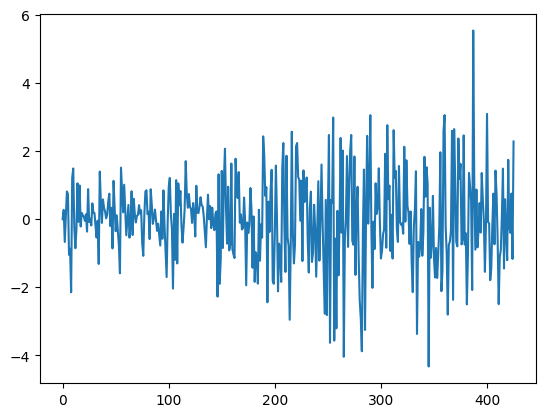

In [21]:
plt.plot(df1.index, df1['% update ^GSPC'])

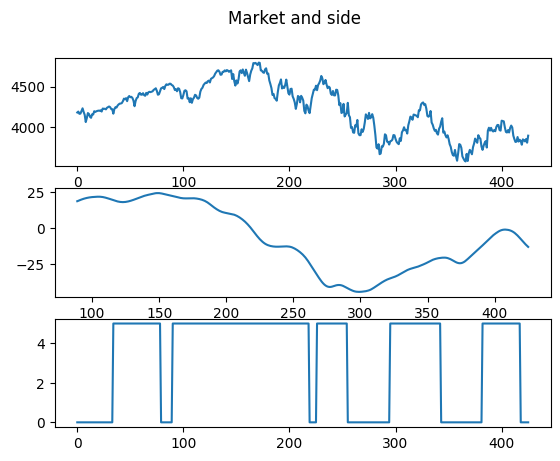

In [22]:
fig, axs = plt.subplots(3)
fig.suptitle('Market and side')
axs[0].plot(df1.index, df1[f'{market_ticker}'])
axs[1].plot(df1.index, df1[f'signal_macd_rol_{ma_sign}'])
axs[2].plot(df1.index, df1['num_signal'])

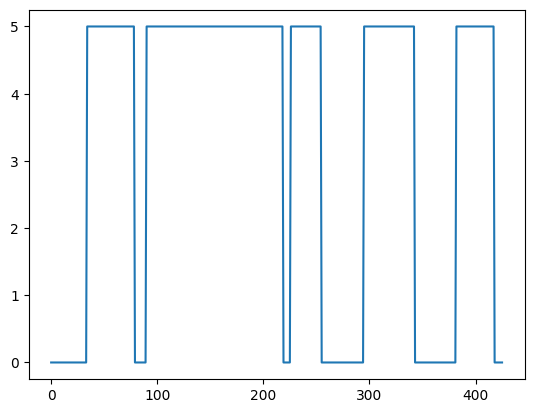

In [23]:
plt.plot(df1.index, df1['num_signal'])

In [24]:
df['Sum'].sum()

-0.09771689191192756

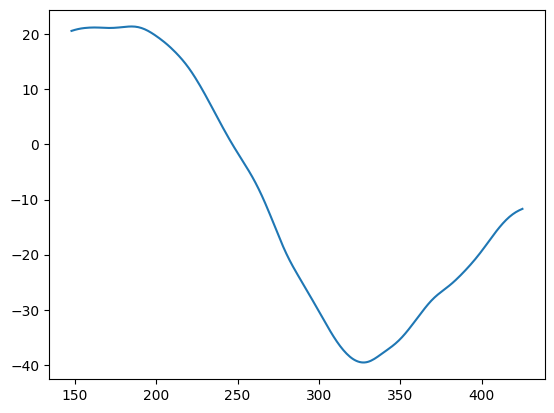

In [25]:
plt.plot(df1.index, df1[f'rol_rol_signal_macd_{ma_sign}'])

In [26]:
df1['Side'].value_counts()

Minus    218
Plus     208
Name: Side, dtype: int64